# Packages and plot functions

In [1]:
%inline matplotlib
import itertools

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
np.random.seed(42)

plot_params = {'legend.fontsize': 20,
               'figure.figsize': (18, 8),
               'axes.labelsize':  15,
               'axes.titlesize':  30,
               'xtick.labelsize': 15,
               'ytick.labelsize': 15,
               'figure.dpi': 300}

plt.style.use('seaborn-v0_8')

plt.rcParams.update(plot_params)

color_dark_blue = [1/255, 62/255, 125/255]
color_light_blue = [6/255, 143/255, 203/255]
purple = [102/255, 51/255, 153/255]

colors = [color_dark_blue, color_light_blue, purple]

color_line = list(itertools.product(['-', ':', '--', ':' '-', ':'], colors))

# Time Series Examples


In [21]:
df1 = pd.read_csv('stock_prices.csv', index_col=0)['US: S&P 500']
df1.index = pd.to_datetime(df1.index, format='%Y-%m-%d').to_period('D').to_timestamp()

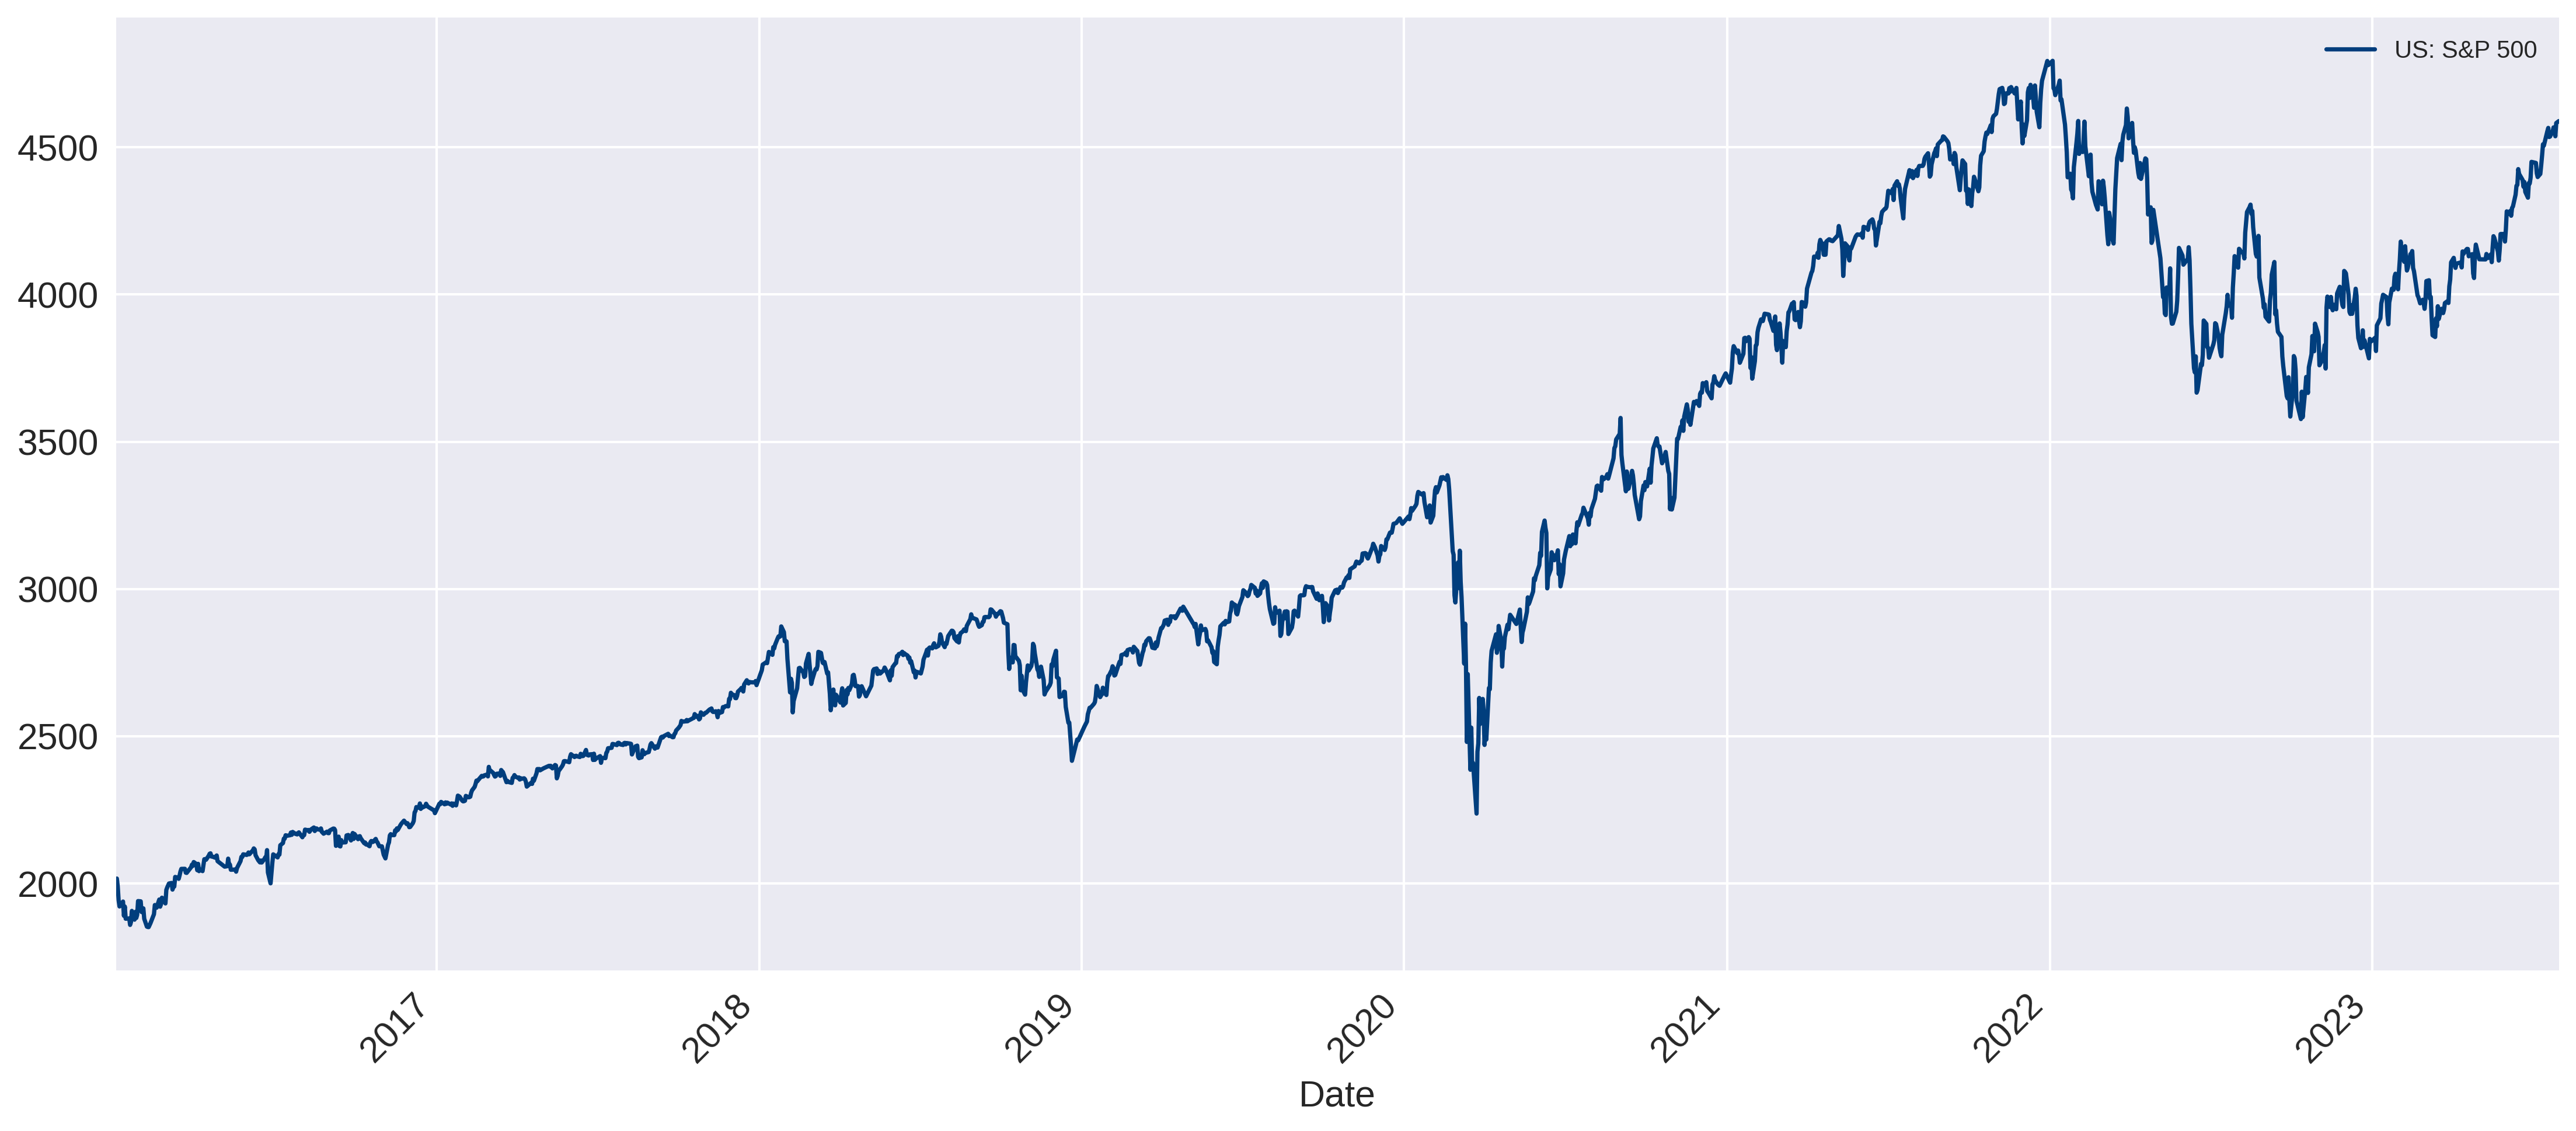

In [22]:
df1.plot(color=color_line[0][1], linestyle=color_line[0][0])
plt.legend(fontsize="10")
plt.xticks(rotation=45, ha='right')
plt.xlim([df1.index[0], df1.index[-1]]);

In [23]:
df2 = pd.read_csv('temperatures.csv', index_col=0).dropna().squeeze()
df2.index = pd.to_datetime(df2.index, format='%m/%d/%Y').to_period('D').to_timestamp()
df2 = df2[df2.index > '1/1/1950']

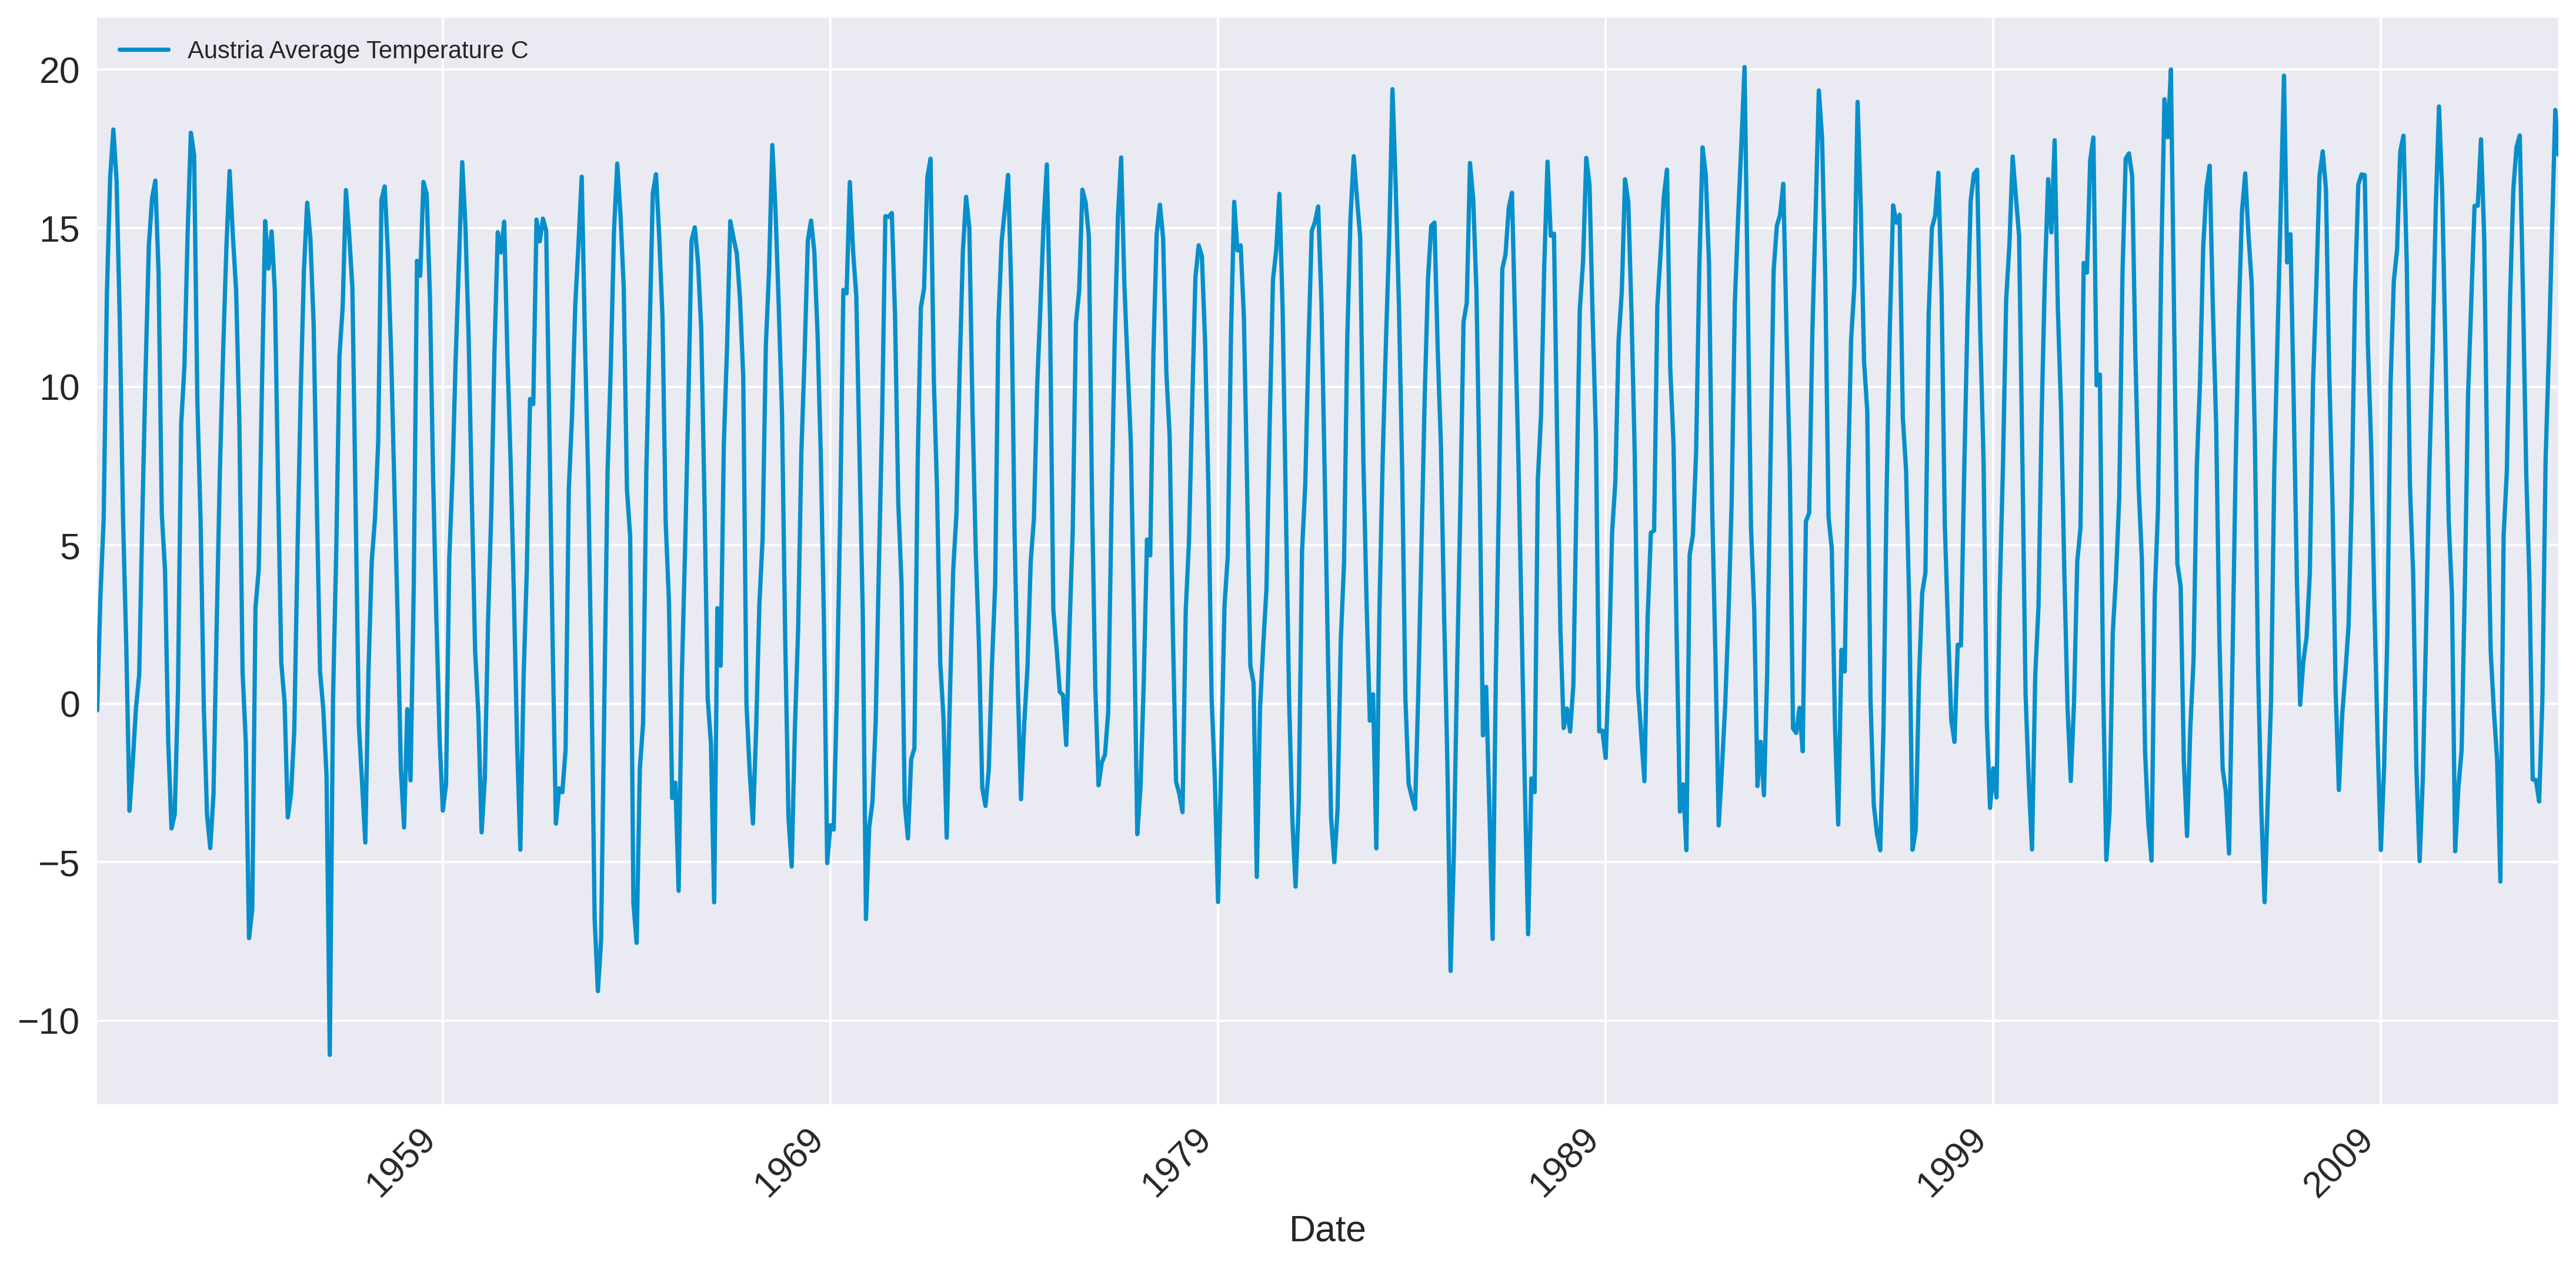

In [24]:
df2.plot(color=color_line[1][1], linestyle=color_line[0][0])
plt.legend(fontsize="10")
plt.xticks(rotation=45, ha='right')
plt.xlim([df2.index[0], df2.index[-1]]);

In [25]:
df3 = pd.read_csv('AirPassengers.csv', index_col=0).dropna().squeeze()
df3.index = pd.to_datetime(df3.index, format='%Y-%m').to_period('M').to_timestamp()

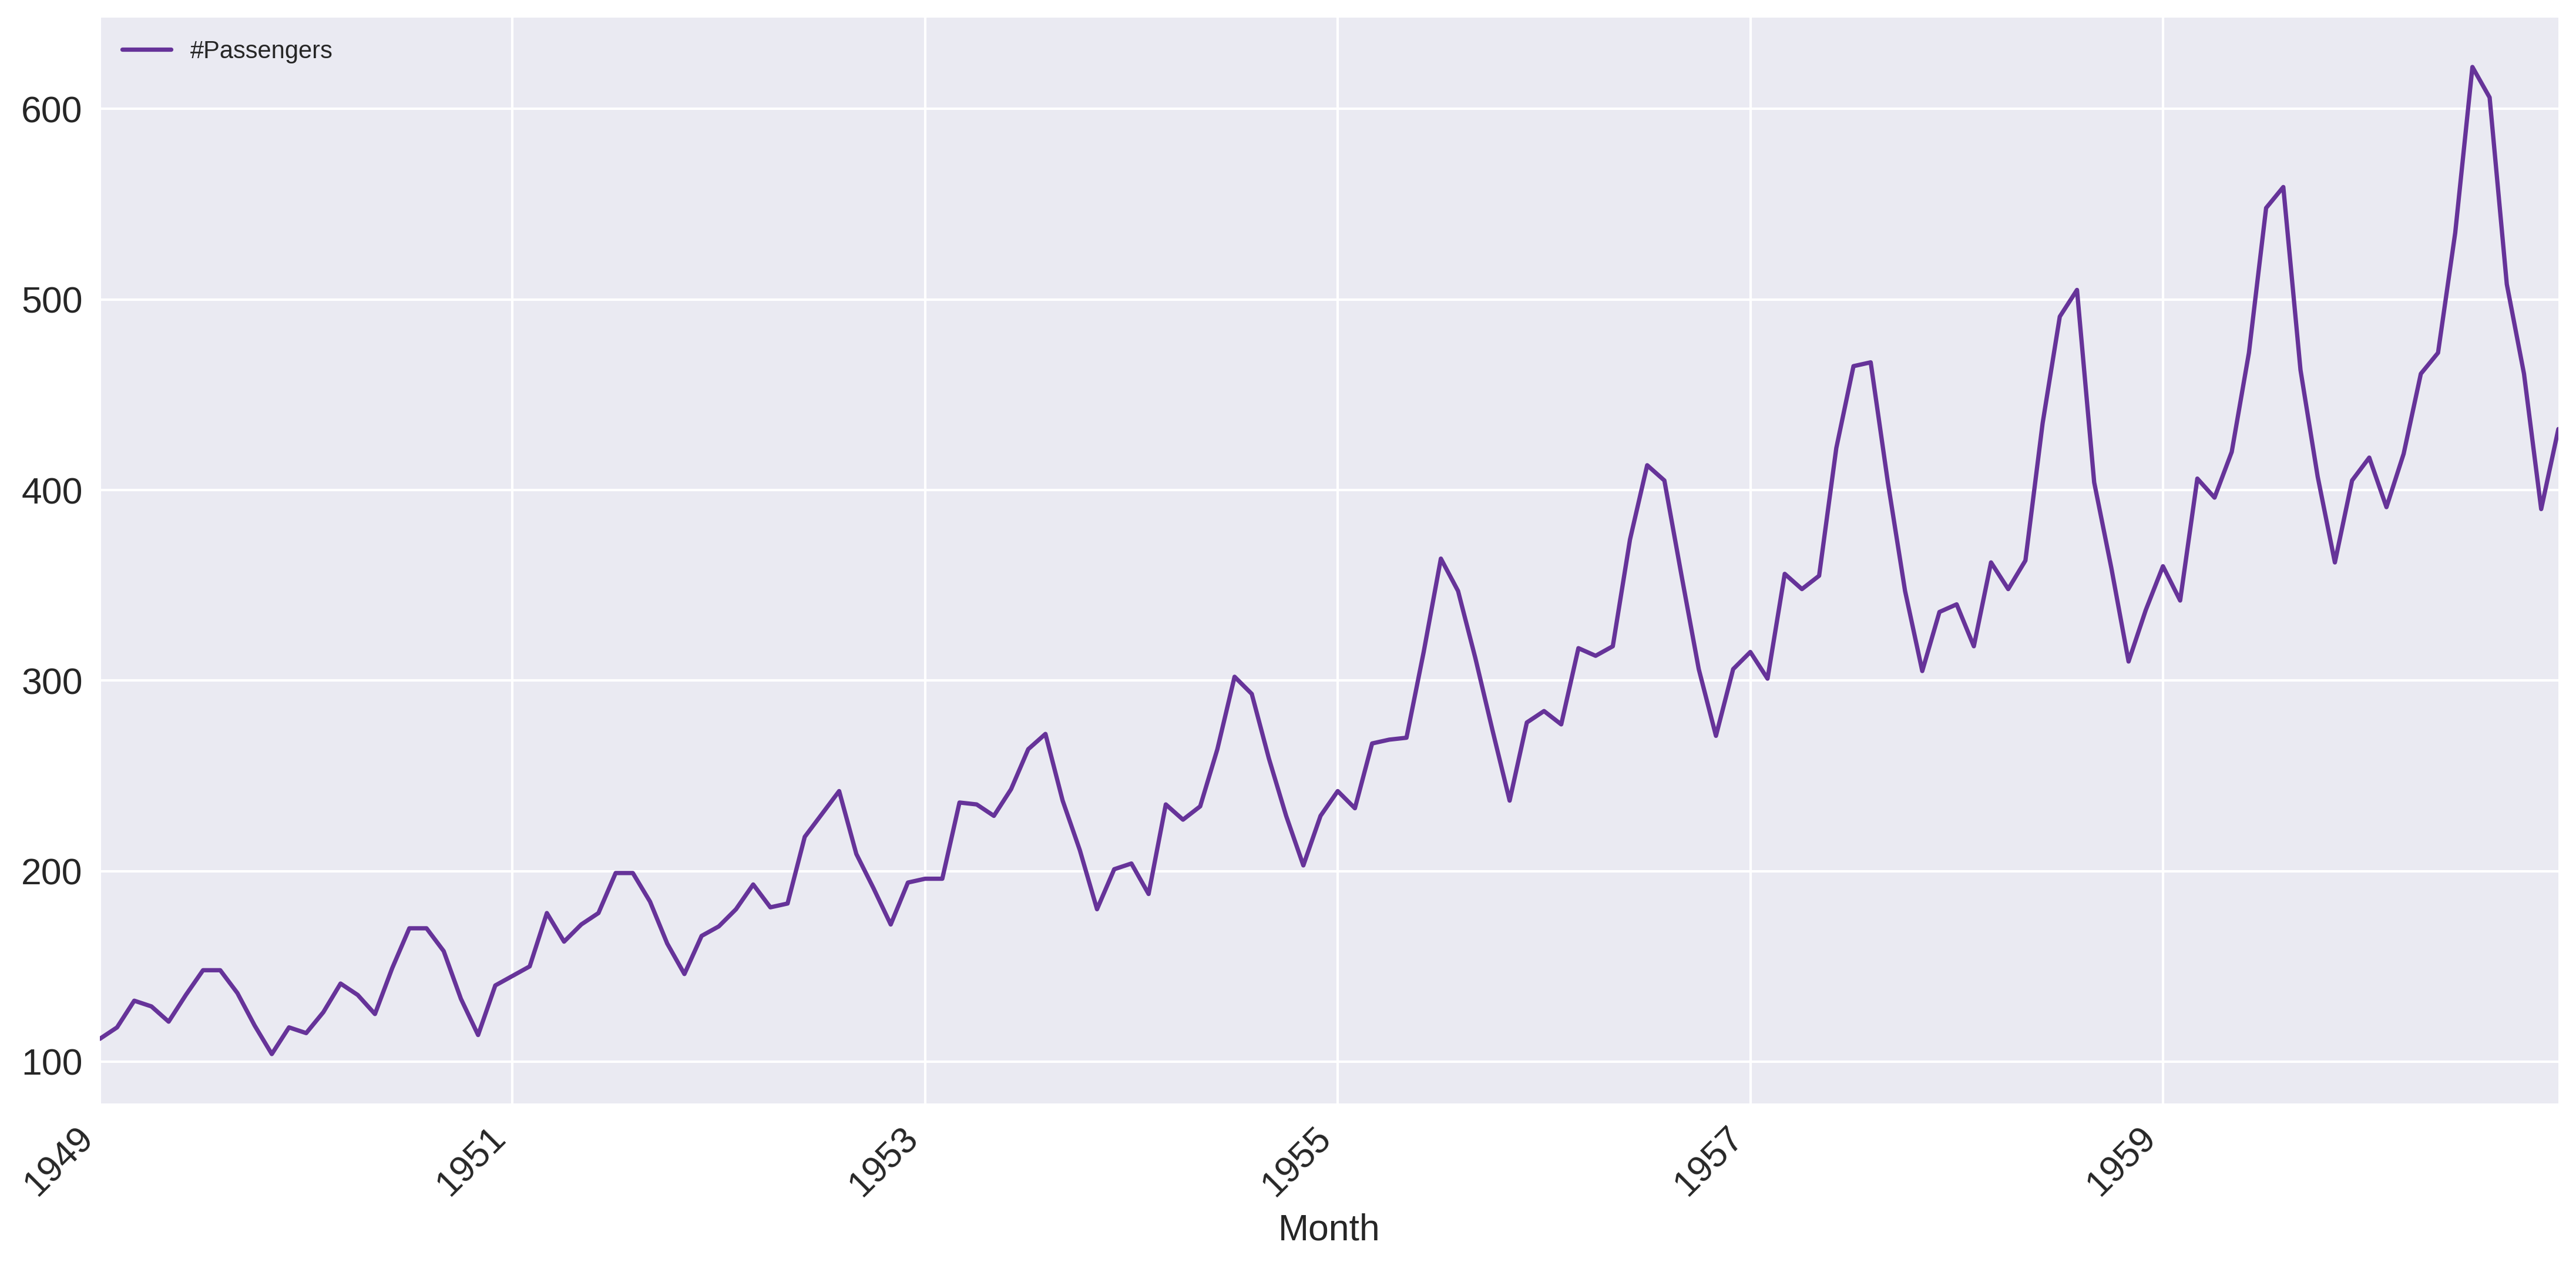

In [26]:
df3.plot(color=color_line[2][1], linestyle=color_line[0][0])
plt.legend(fontsize="10")
plt.xticks(rotation=45, ha='right')
plt.xlim([df3.index[0], df3.index[-1]]);

In [27]:
df4 = pd.read_csv('macro_monthly.csv', index_col=0).dropna()
df4.index = pd.DatetimeIndex(df4.index).to_period('M').to_timestamp()

In [28]:
df4.columns = ['Unemployment Rate',
'Personal Saving Rate',
'M2','Disposable Income',
 'Personal Consumption Expenditure',
 'Real Effective Exchange Rate',
 '10Y Treasury Yield',
 'Fed Rate',
 'Construction Spending',
 'Industrial Production Index',
 'Core CPI']

df4 = df4['Unemployment Rate']

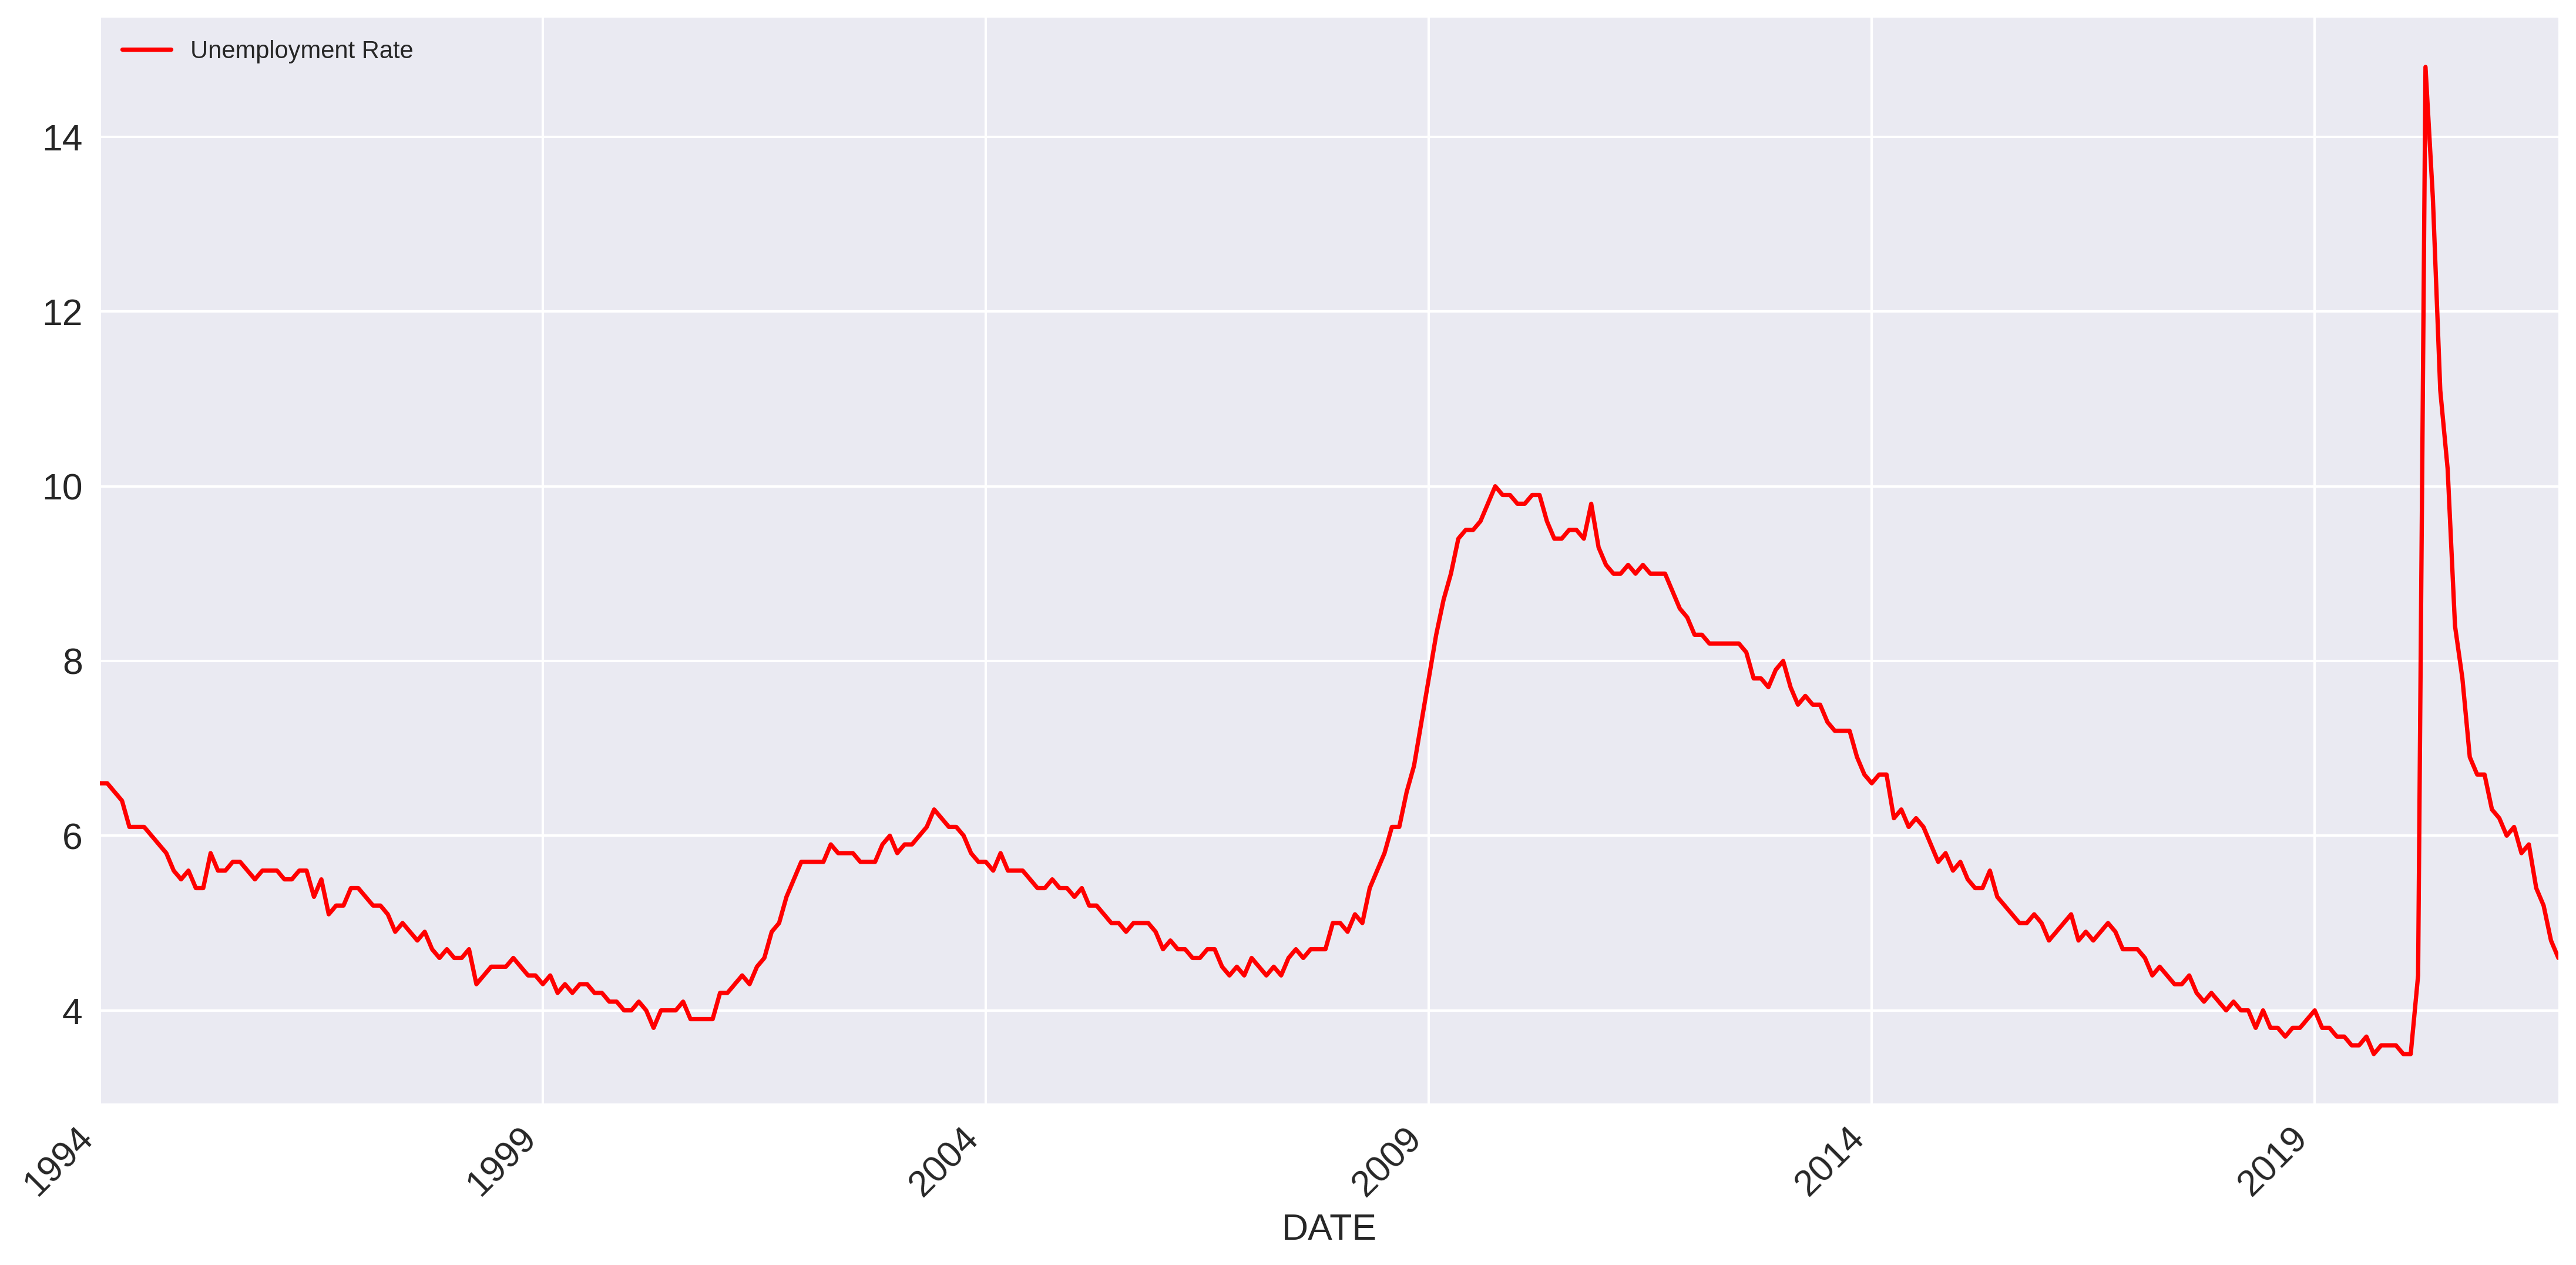

In [29]:
df4.plot(color='r', linestyle=color_line[0][0])
plt.legend(fontsize="10")
plt.xticks(rotation=45, ha='right')
plt.xlim([df4.index[0], df4.index[-1]]);

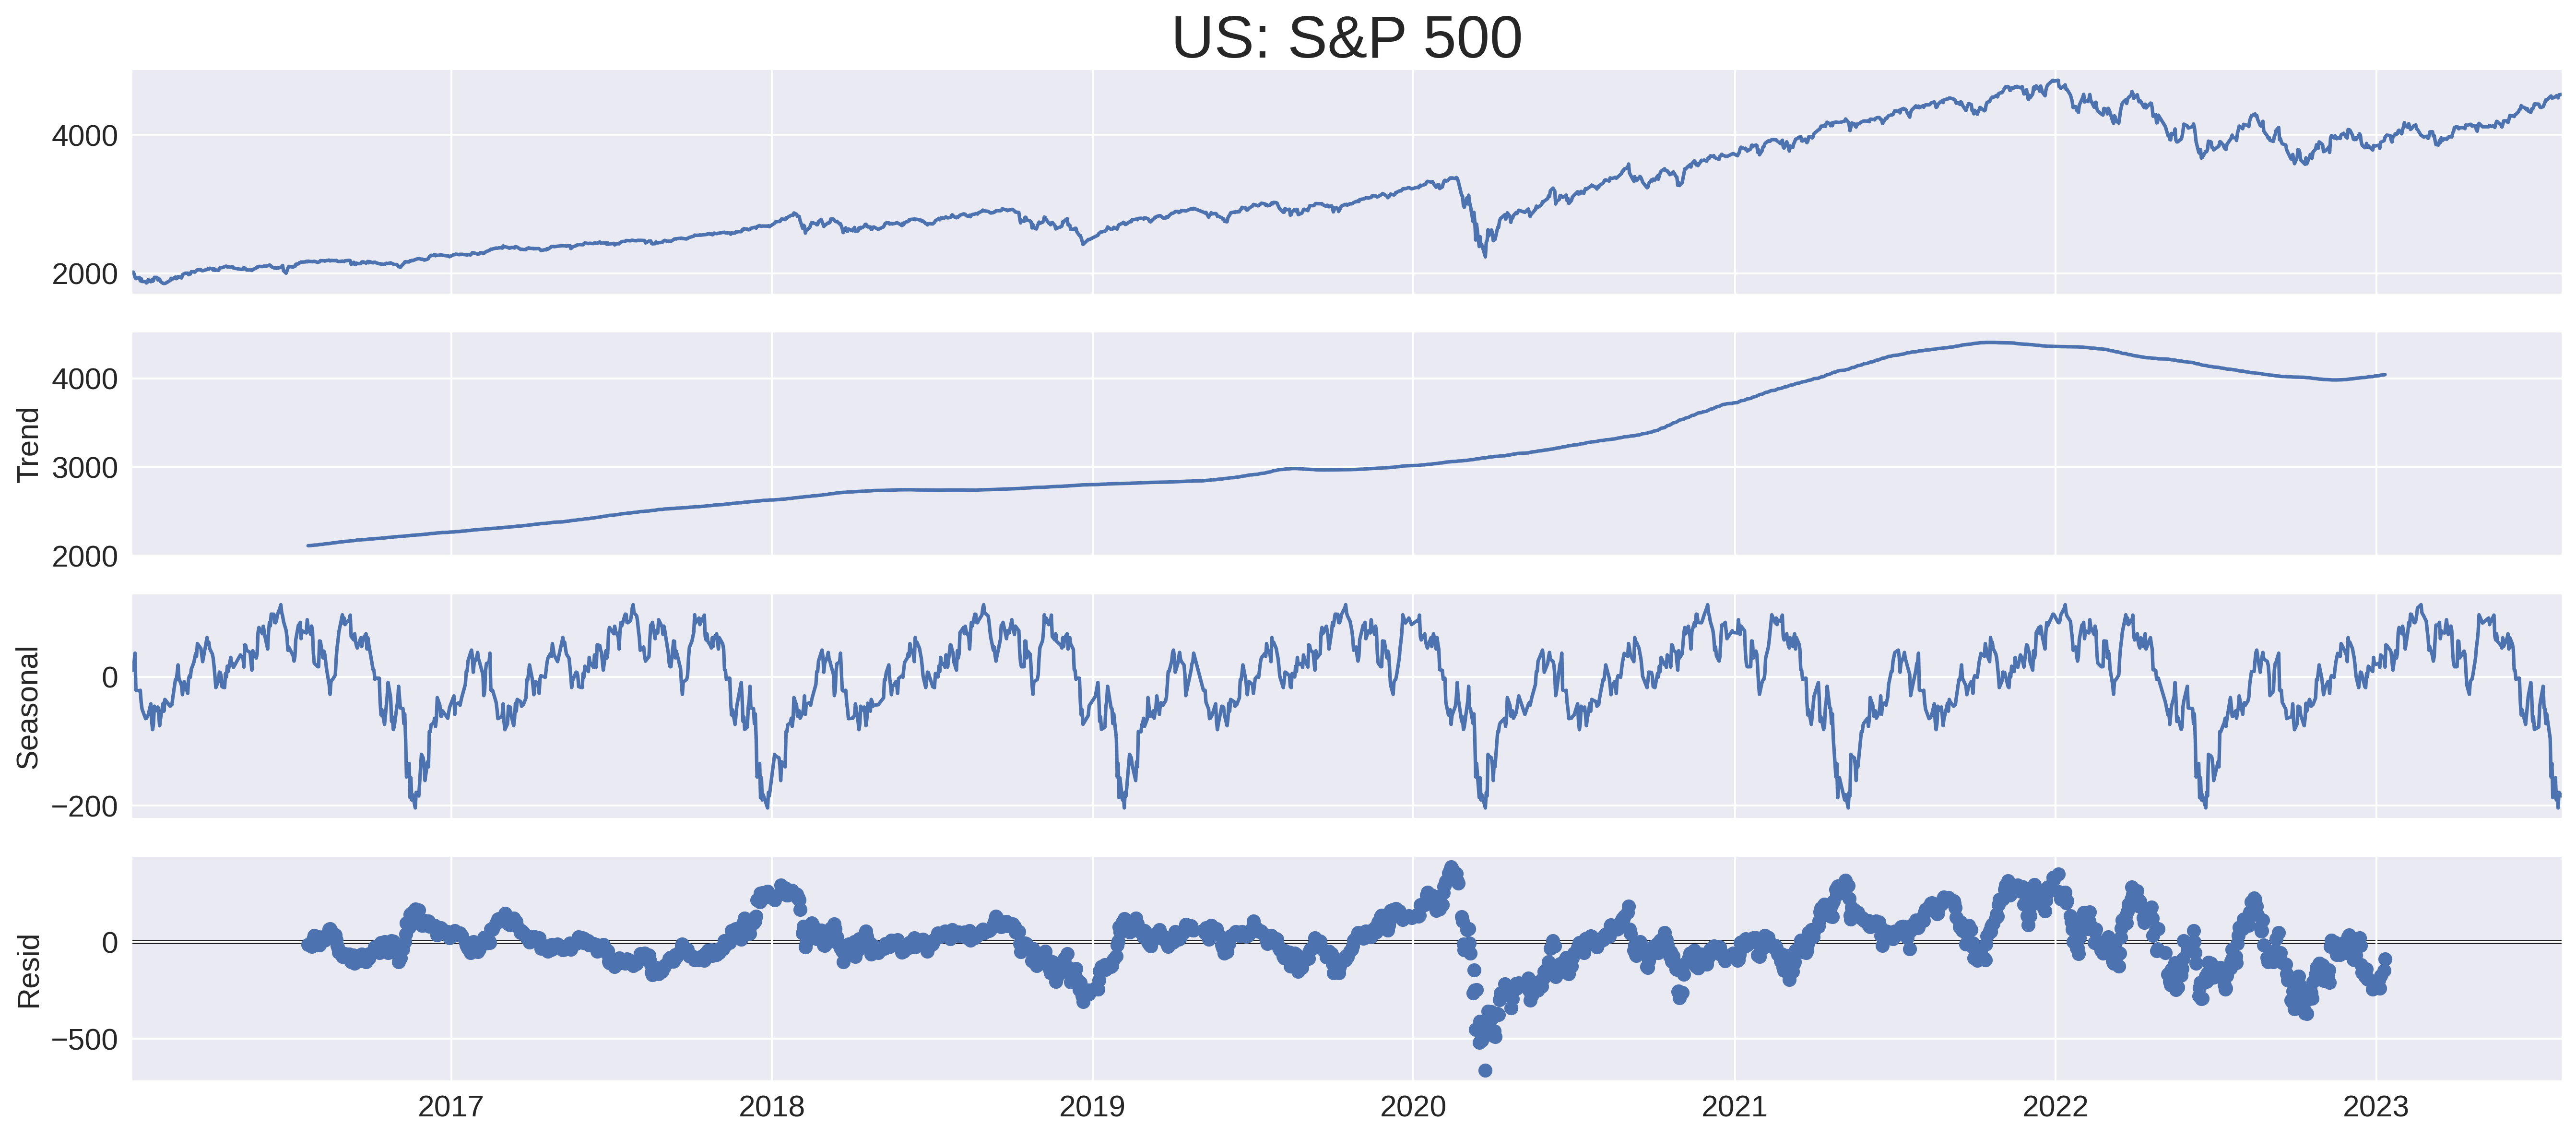

In [31]:
result = seasonal_decompose(df1, model='additive', period=252)
fig = result.plot()
fig.tight_layout()
plt.show()

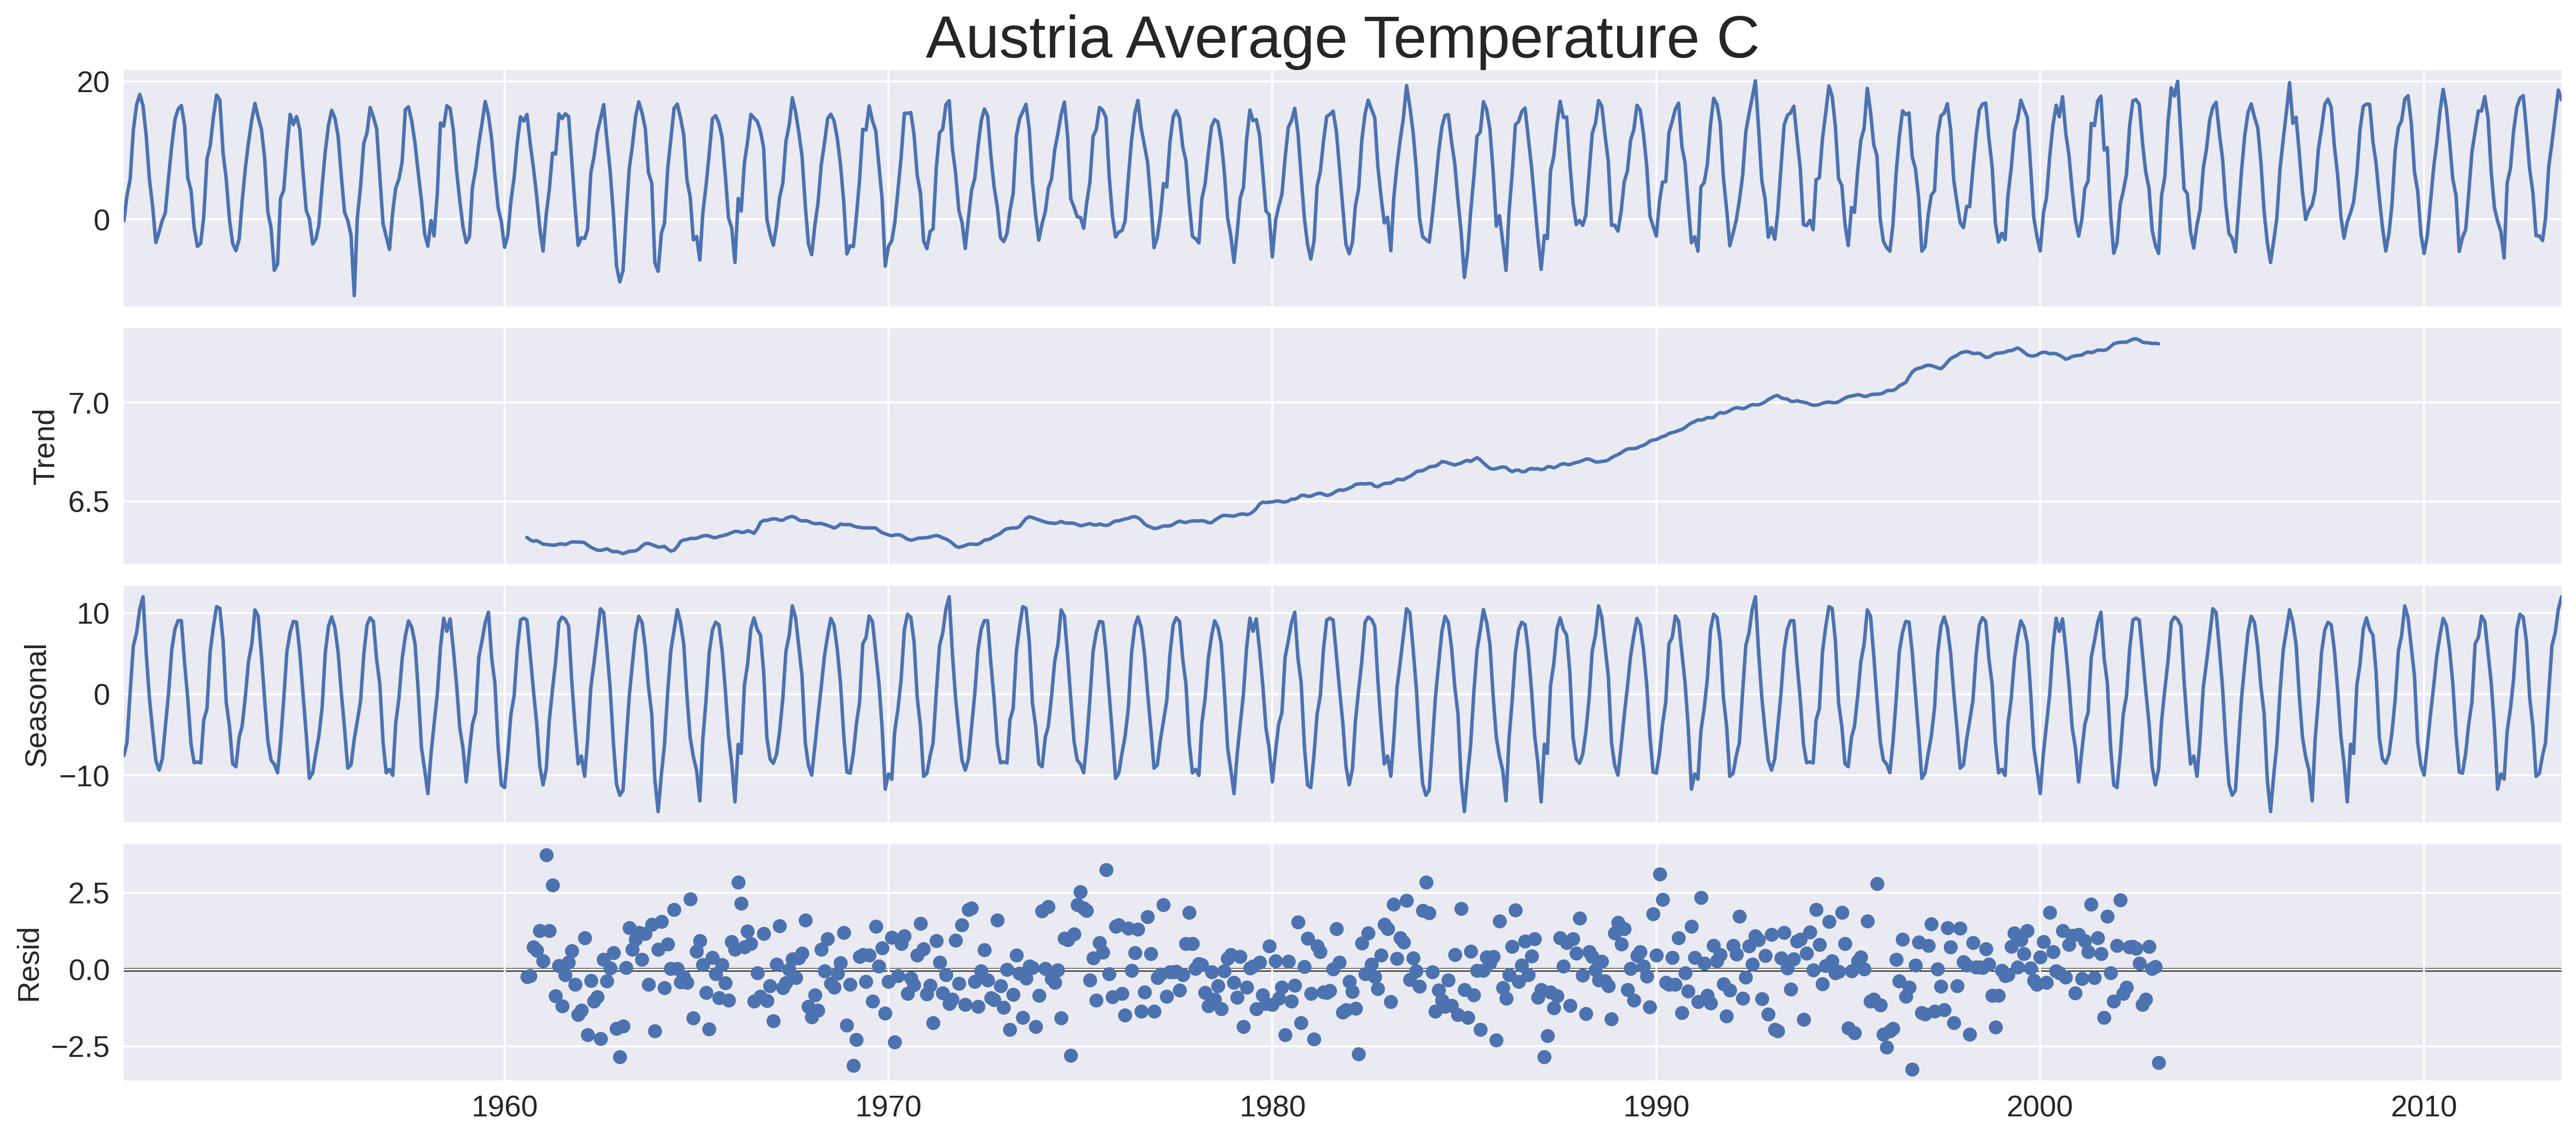

In [39]:
result = seasonal_decompose(df2, model='additive', period=252)
fig = result.plot()
fig.tight_layout()
plt.show()

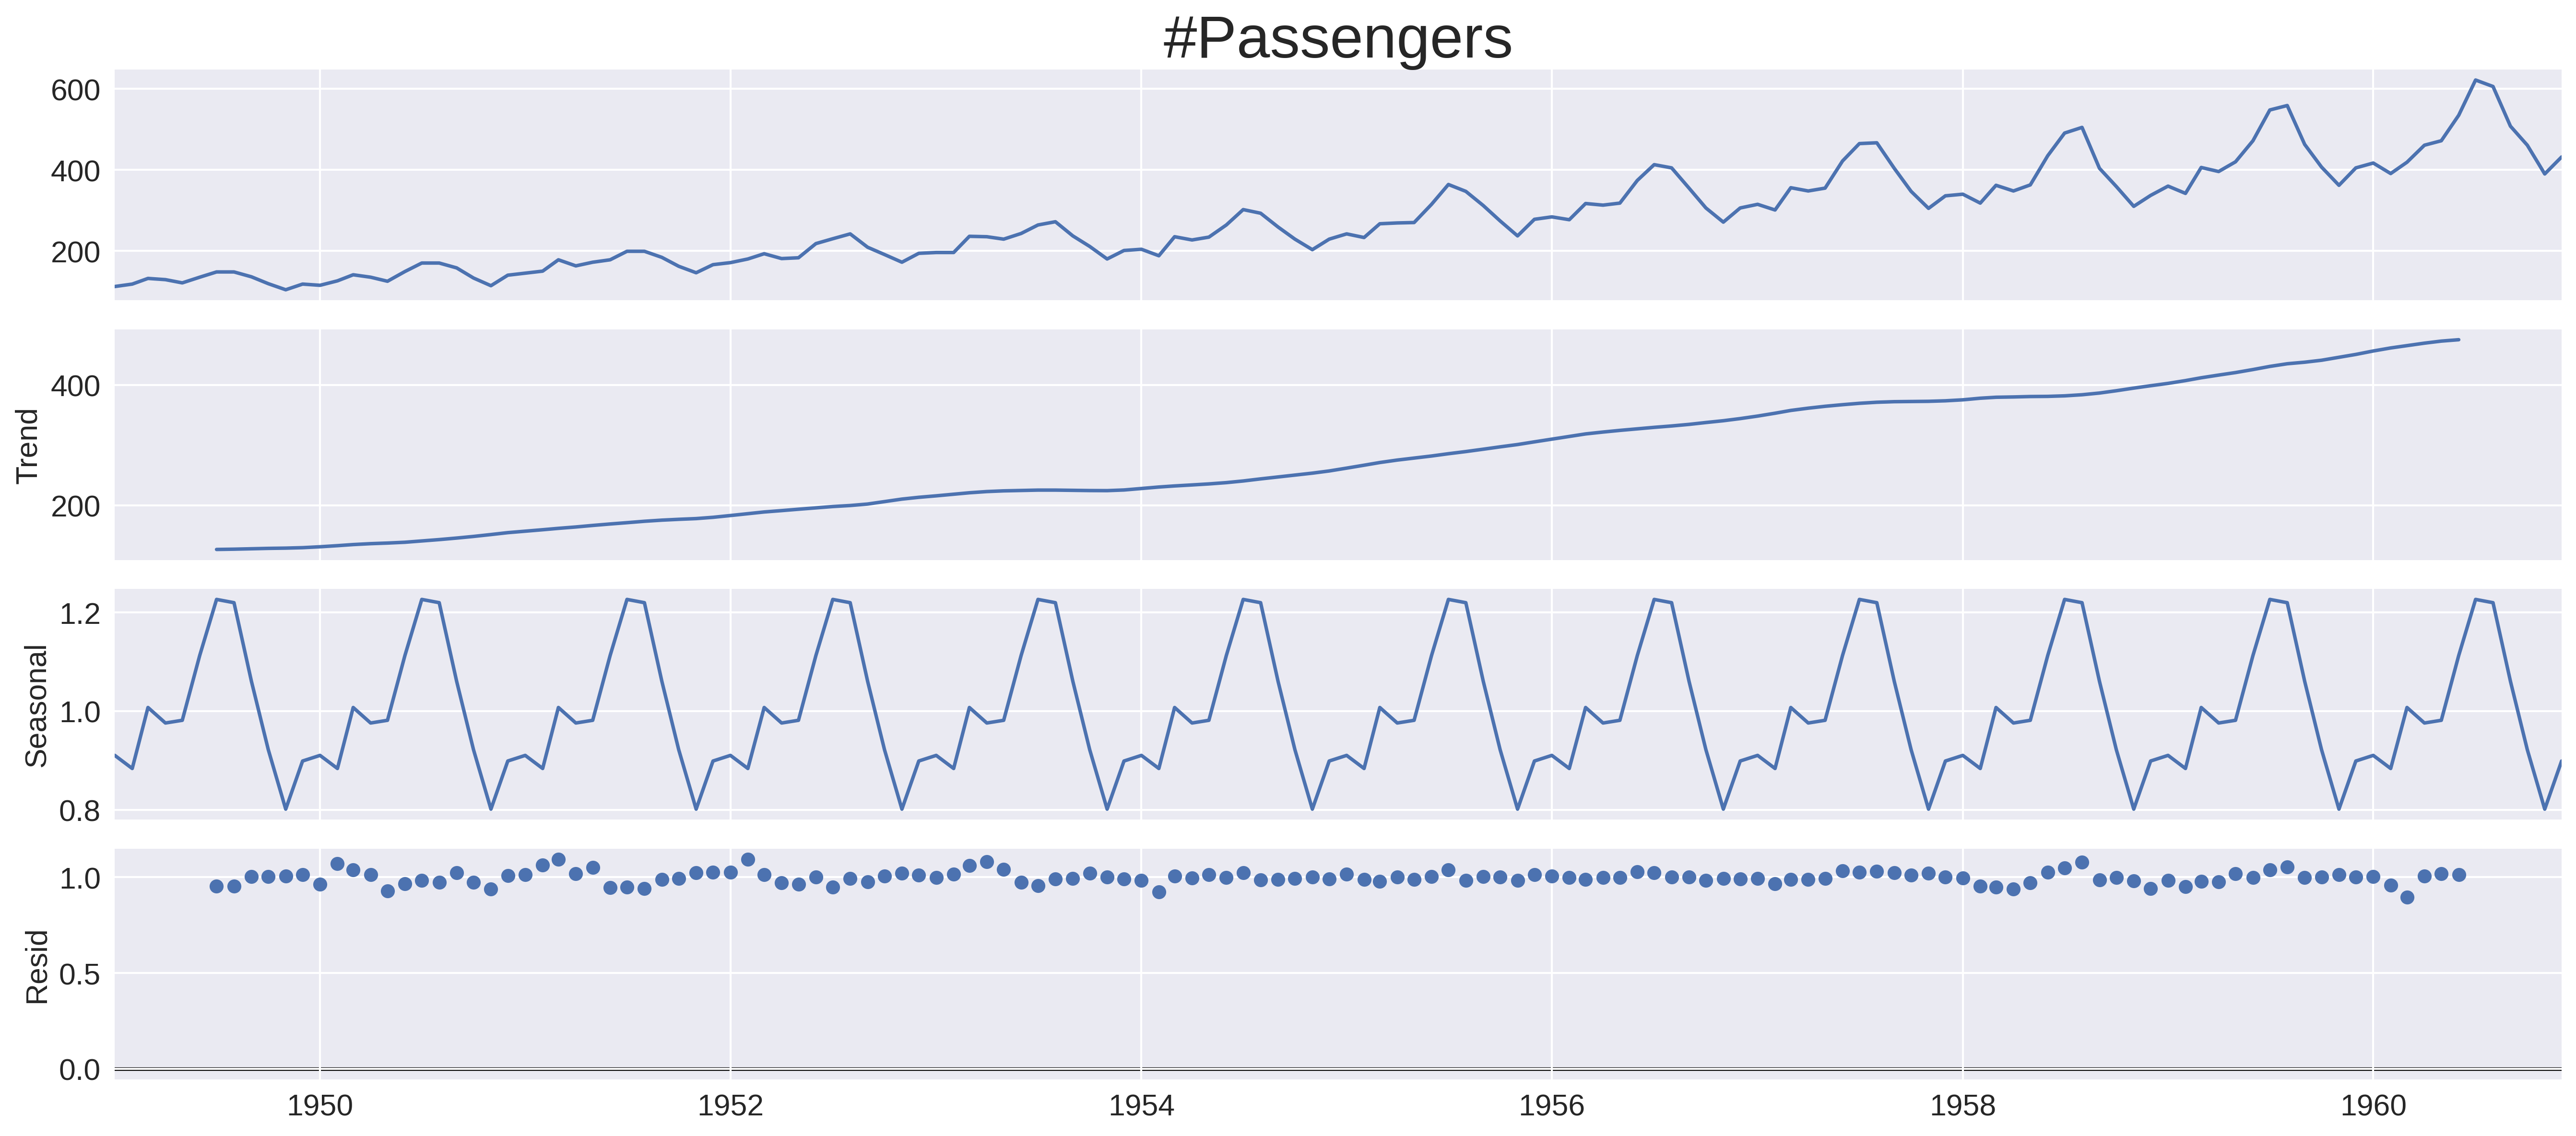

In [36]:
result = seasonal_decompose(df3, model='multiplicative', period=12)
fig = result.plot()
fig.tight_layout()
plt.show()

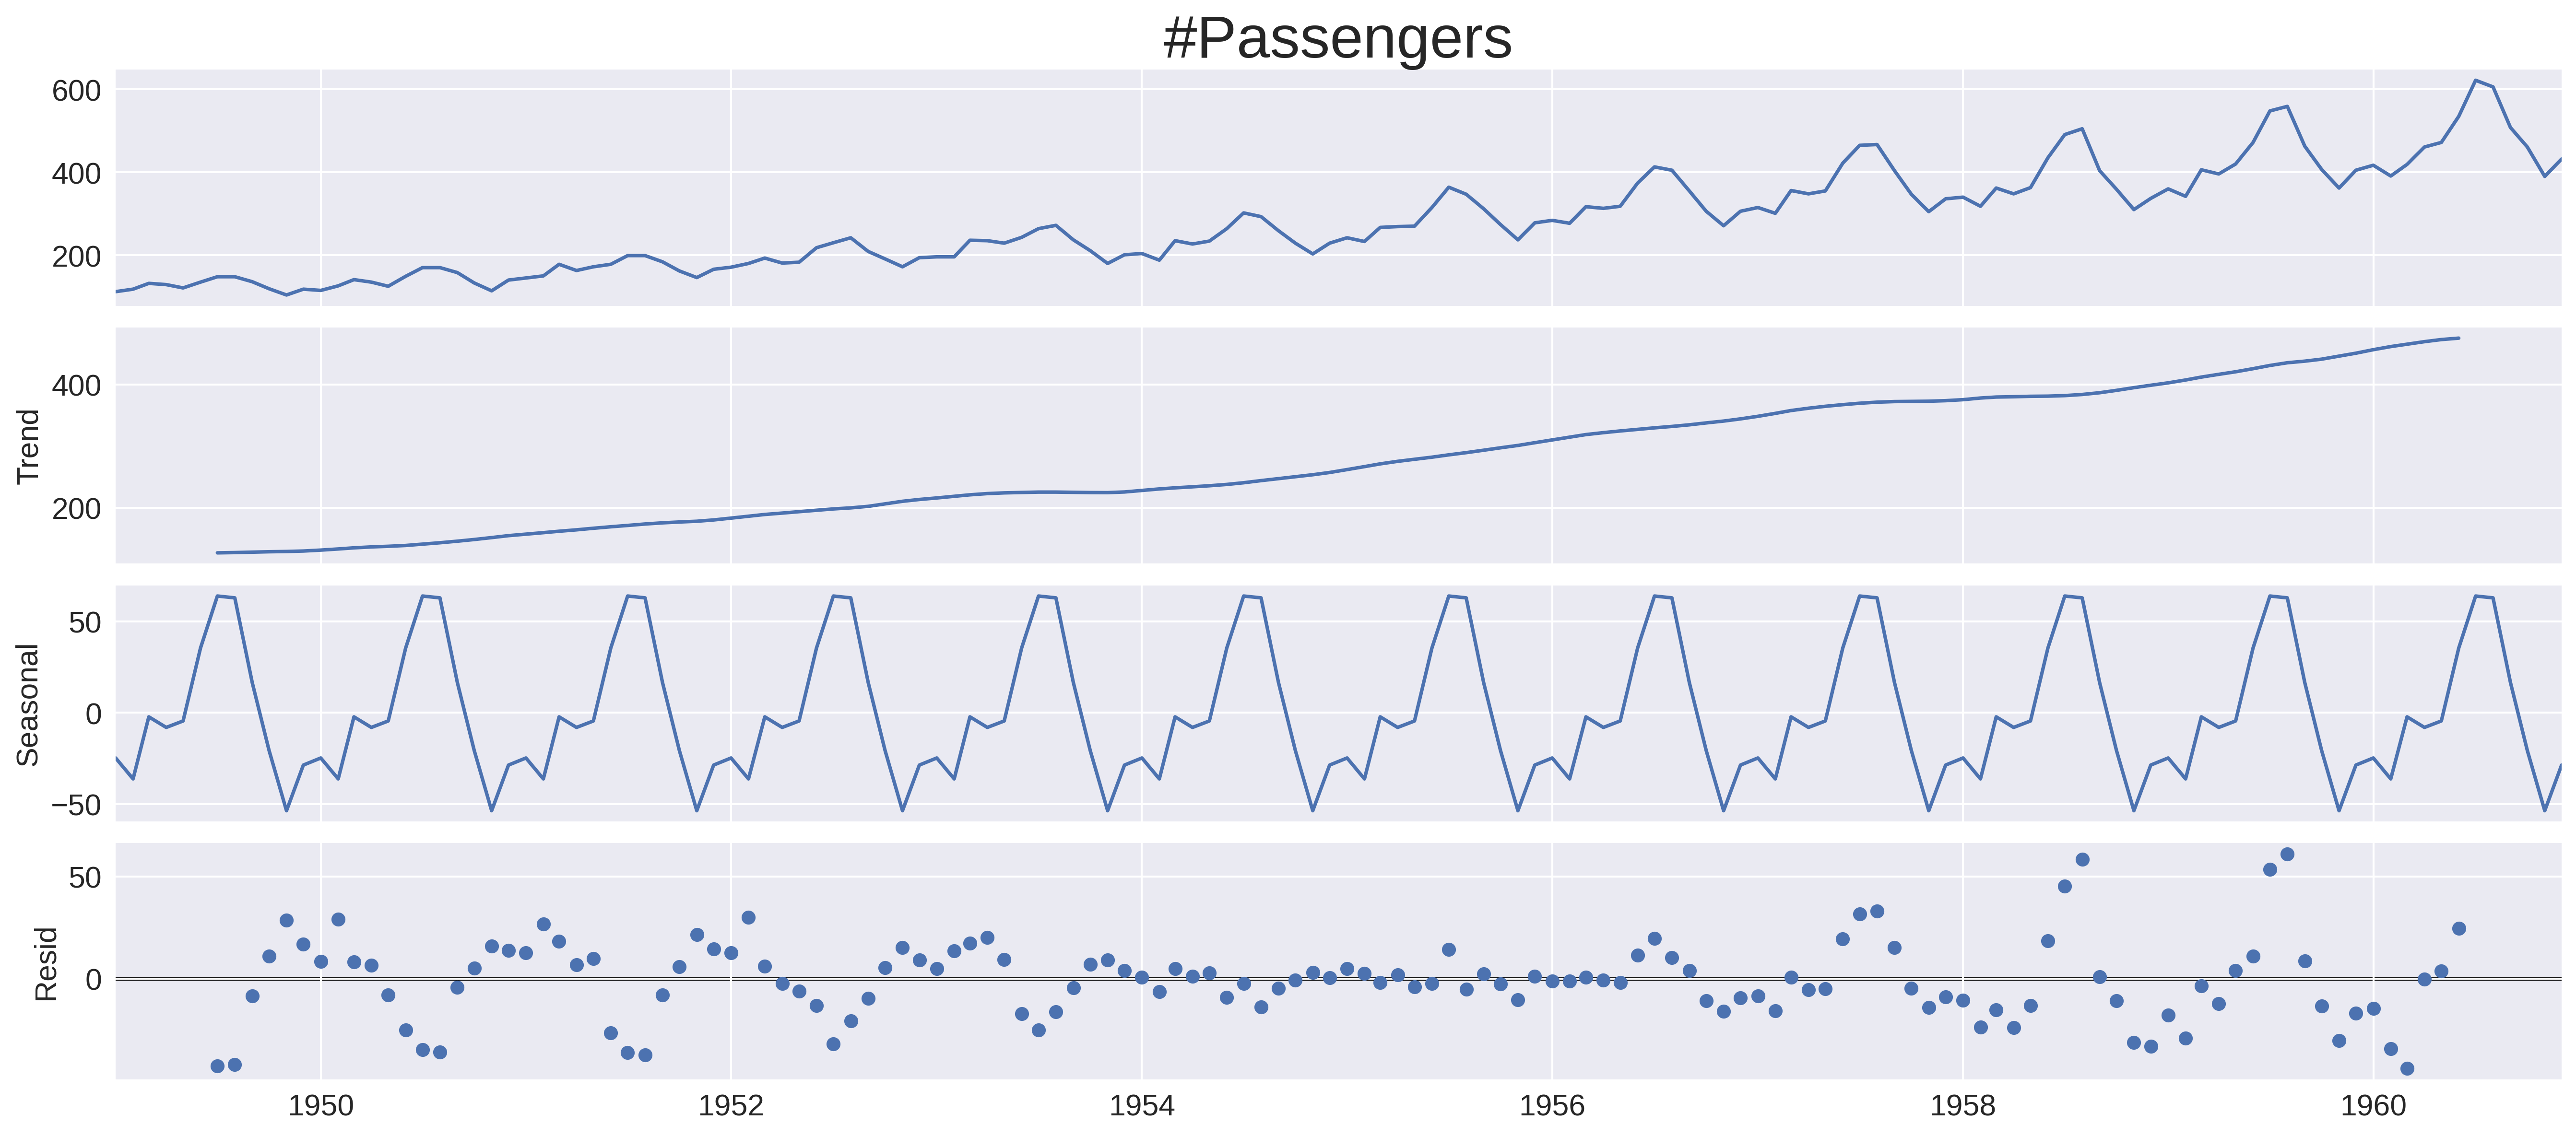

In [37]:
result = seasonal_decompose(df3, model='additive', period=12)
fig = result.plot()
fig.tight_layout()
plt.show()

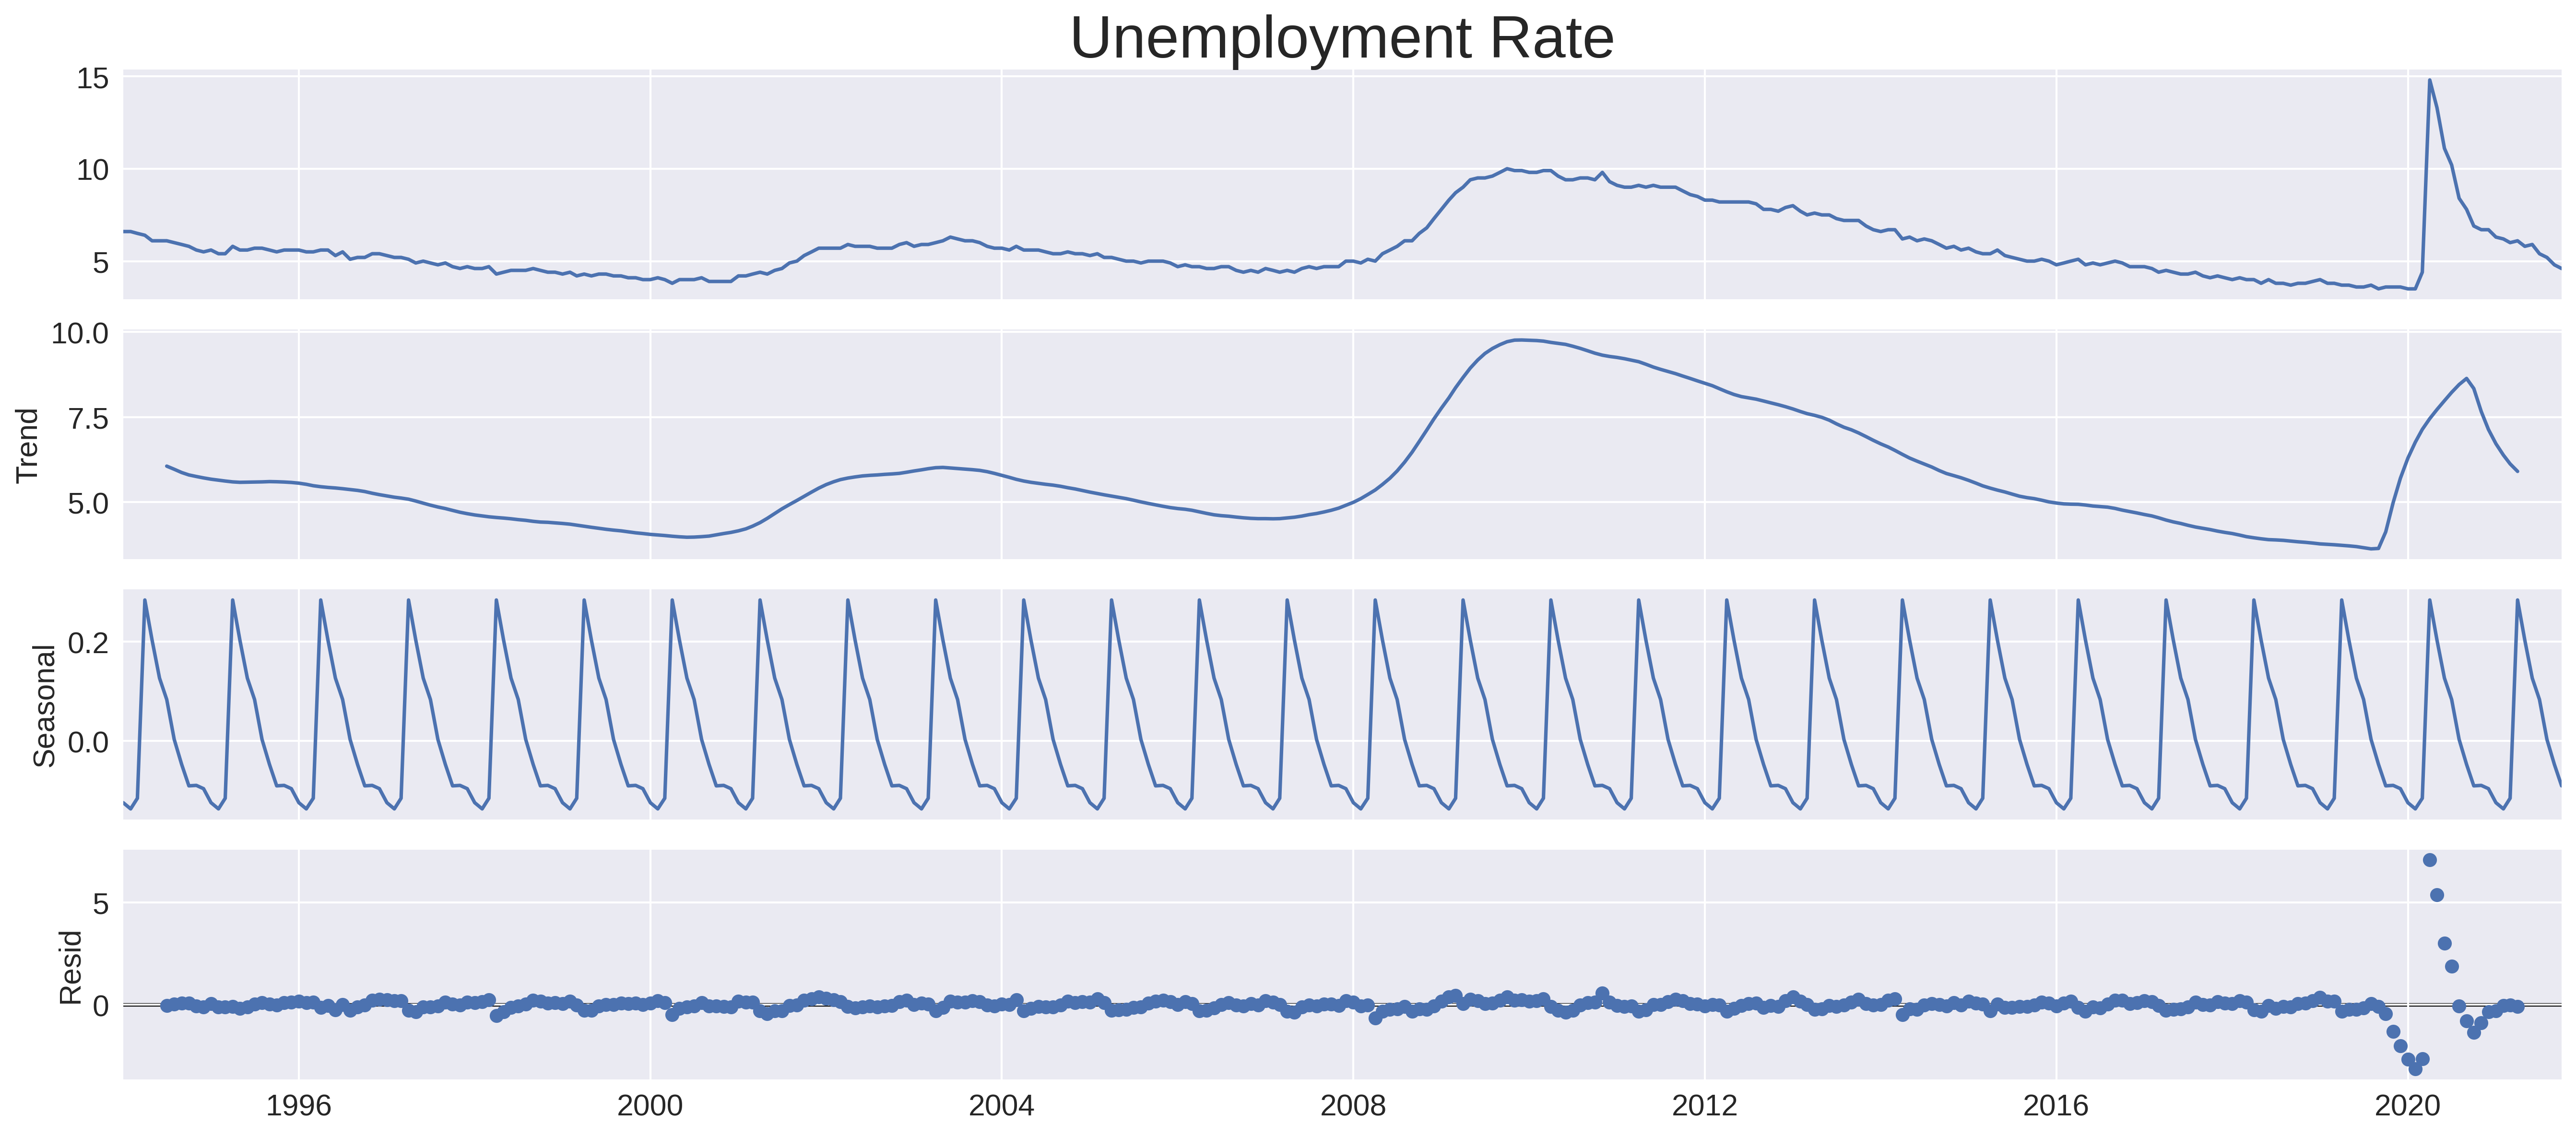

In [38]:
result = seasonal_decompose(df4, model='additive', period=12)
fig = result.plot()
fig.tight_layout()
plt.show()